In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pangho
import datetime 

import interpretable as inter 
import interpretable_linear_data as interData

from datetime import date
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import sys
import os
from pandas import Grouper as tg

In [2]:
# dumping parameters

prgs = ['HF_SPMINI'] # we choose the financial asset using its key
start_date, end_date = '2019-01-01', '2019-01-31' # we choose the considered time interval 
root = '.'

In [3]:
# we generate the script and the files
script, files, dates = interData.get_script(prgs, start_date, end_date, root)

In [4]:
# we create a dictionnary of dataframes, containing the dumped datas for every day of trading

#dataframe_collection = {} # it's our dictionnary

#for day in dates: # we fill the dictionnary with the dataframe for each day of trading 
    #dataframe_collection[day] = pangho.Store(files['HF_SPMINI', day])['prg:HF_SPMINI:trades']

In [5]:
store = pangho.Store('/mnt/research-live/user/gpalmari/data.h5')

In [6]:
store.keys()

['__config__', 'prg:HF_SPMINI:sourceMap', 'prg:HF_SPMINI:trades']

In [7]:
trades = store['prg:HF_SPMINI:trades']

In [8]:
% store trades

Stored 'trades' (DataFrame)


In [9]:
trades2 = trades[['price', 'condition','qty', 'ask','bid',
                 'volume', 'evt_seq_num', 'ts_recv', 
                 'ts_market', 'type', 'bid_size',
                  'ask_size']].copy()

In [10]:
trades2.dropna(inplace = True)

In [11]:
dfSPMINI = interData.data_cleaner3(trades2, 10000, 0)

(6222401, 12)
6222401
(6222400, 13)
(6222400, 15)
(6222400, 16)
(6222400, 16)
(6222400, 16)


In [18]:
dfSPMINI.dropna(inplace = True)
% store dfSPMINI 

Stored 'dfSPMINI' (DataFrame)


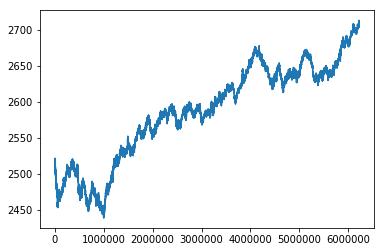

In [19]:
plt.plot(dfSPMINI.mid)

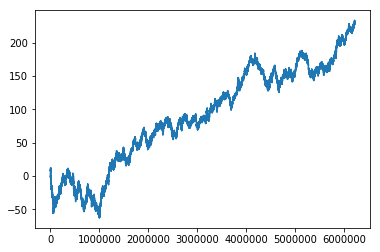

In [20]:
plt.plot(dfSPMINI.returns.cumsum())

In [21]:
dfSPMINI.isnull().sum(axis = 0)

qty                     0
ask                     0
bid                     0
evt_seq_num             0
ts_recv                 0
ts_market               0
type                    0
bid_size                0
ask_size                0
mid                     0
qty_signed              0
volume                  0
returns                 0
hour                    0
qty_signed_squared_x    0
qty_signed_squared_y    0
dtype: int64

In [23]:
dfSPMINI.shape

(6222379, 16)